# Решающие деревья

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Данные

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Графический анализ

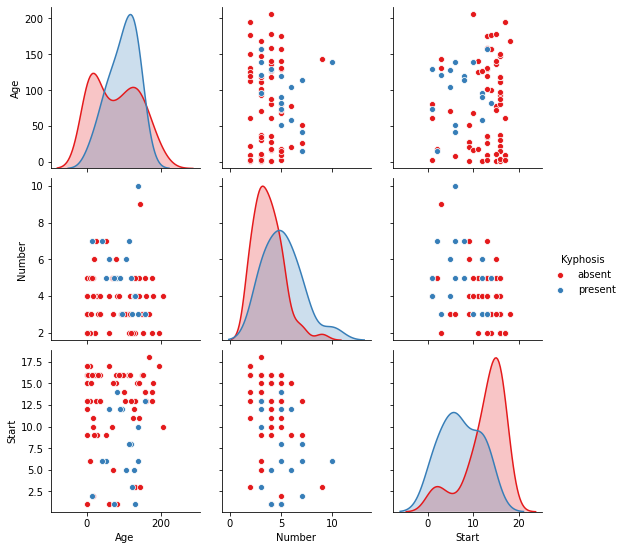

In [3]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

## Формирование тренировочного и тестового массива данных

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Решающие деревья

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Предсказания и оценка модели

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [13]:
print(confusion_matrix(y_test, predictions))

[[12  5]
 [ 6  2]]


## Визуализация дерева

[Text(152.1818181818182, 203.85, 'X[1] <= 4.5\ngini = 0.27\nsamples = 56\nvalue = [47, 9]'),
 Text(60.872727272727275, 176.67000000000002, 'X[0] <= 128.5\ngini = 0.142\nsamples = 39\nvalue = [36, 3]'),
 Text(30.436363636363637, 149.49, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(91.30909090909091, 149.49, 'X[2] <= 13.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(60.872727272727275, 122.31, 'X[1] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(30.436363636363637, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(91.30909090909091, 95.13, 'X[0] <= 181.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(60.872727272727275, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(121.74545454545455, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(121.74545454545455, 122.31, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(243.4909090909091, 176.67000000000002, 'X[0] <= 125.5\ngini = 0.457\nsamples = 17\nvalue = [11, 6]')

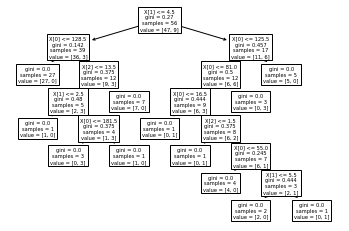

In [22]:
plot_tree(dtree)

## Random Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=200)

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [28]:
print(confusion_matrix(y_test, predictions))

[[12  5]
 [ 6  2]]
